In [93]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import re
import tweepy
import datetime
import time
import nltk
import requests
import time
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import csv
import re
import string
from bs4 import BeautifulSoup  
from selenium import webdriver
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from sklearn.feature_extraction.text import CountVectorizer
from selenium.webdriver.support import expected_conditions as EC
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [94]:
all_news_links = ['https://techcrunch.com/2023/04/21/lyft-to-make-significant-cuts-across-ride-hailing-company/', 'https://techcrunch.com/2023/04/26/roku-gains-1-6-million-active-streaming-accounts-in-q1-warns-of-continued-ad-uncertainty/', 'https://techcrunch.com/2023/04/26/lookout-sells-its-consumer-cybersecurity-business-to-f-secure-and-goes-all-in-on-the-enterprise/', 'https://techcrunch.com/2023/05/03/bend-carbon-offset-corporate-spend/', 'https://techcrunch.com/2023/03/31/techcrunch-roundup-3-key-hiring-metrics-building-sdr-teams-insurtech-investor-survey/', 'https://techcrunch.com/2023/04/17/daily-crunch-sideloaded-apps-coming-soon-to-an-iphone-near-you-in-ios-17/', 'https://techcrunch.com/2023/03/23/svb-black-owned-banks/', 'https://techcrunch.com/2023/04/17/netflix-issues-love-is-blind-livestream-reunion/', 'https://techcrunch.com/2023/04/14/4-saas-engagement-metrics-that-attract-investors/', 'https://techcrunch.com/2023/04/17/mercedes-debuts-the-maybach-eqs-suv-with-more-power-range-and-luxury/', 'https://techcrunch.com/2023/03/23/vue-snaps-up-20m-to-grow-its-open-source-based-frontend-as-a-service-e-commerce-toolkit-and-platform/', 'https://techcrunch.com/2023/05/02/daily-crunch-due-to-growing-concerns-about-security-risks-samsung-bans-workers-from-using-generative-ai/', 'https://techcrunch.com/2023/04/20/coinbase-is-expanding-further-overseas-amid-us-regulatory-pressure/', 'https://techcrunch.com/2023/03/30/netflixs-ad-supported-plan-comes-to-apple-tv-after-months-of-delay/', 'https://techcrunch.com/2023/04/26/black-mirror-season-6-set-to-premiere-in-june/', 'https://techcrunch.com/2023/04/13/betaworks-new-camp-aims-to-fund-transformative-early-stage-ai-startups/', 'https://techcrunch.com/2023/03/23/reselling-marketplace-kreams-valuation-rises-to-742m-with-168m-series-c/', 'https://techcrunch.com/2023/04/03/yik-yak-users-are-protesting-the-apps-makeover-after-acquisition-by-sidechat/', 'https://techcrunch.com/2023/04/24/honey-i-shrunk-the-revenue-multiple/', 'https://techcrunch.com/2023/04/13/as-tech-slumps-softbank-sells-vc-unit-to-singapore-based-firm-led-by-masayoshi-sons-brother/', 'https://techcrunch.com/2023/04/11/fitbit-will-start-prompting-users-to-migrate-to-google-accounts-this-summer/', 'https://techcrunch.com/2023/03/28/library-ebook-app-overdrive-to-shut-down-on-may-1st-readers-directed-to-libby-instead/', 'https://techcrunch.com/2023/04/12/game-of-thrones-spinoff-dunk-and-egg/', 'https://techcrunch.com/2023/03/23/relativity-space-launches-first-3d-printed-rocket/', 'https://techcrunch.com/2023/04/16/a-nine-figure-raise-in-fintech-oh-my/', 'https://techcrunch.com/2023/04/03/push-security-raises-15m-to-help-saas-users-lower-their-online-vulnerability/', 'https://techcrunch.com/2023/03/29/spotify-is-testing-new-card-style-user-profiles-focused-on-discovery/', 'https://techcrunch.com/2023/04/14/murdoch-fund-bodhi-cuts-investment-in-reliance-backed-viacom18/', 'https://techcrunch.com/2023/04/24/google-authenticator-can-now-sync-2fa-codes-to-the-cloud/', 'https://techcrunch.com/2023/04/28/openai-funding-valuation-chatgpt/', 'https://techcrunch.com/2023/03/27/casetify-launches-iphone-cases-that-look-like-crocs-with-jibbtiz-yes-for-real/', 'https://techcrunch.com/2023/03/28/saildrone-takes-the-wraps-off-its-voyager-autonomous-research-vessel/', 'https://techcrunch.com/2023/03/28/tiktok-ban-backup-plan-bytedance-owned-instagram-rival-lemon8-hits-the-u-s-app-stores-top-10/', 'https://techcrunch.com/2023/03/26/pinterest-brings-shopping-capabilities-to-shuffles-its-collage-making-app/', 'https://techcrunch.com/2023/05/04/persona-and-index-ventures-talk-identity-and-identifying-a-good-deal/', 'https://techcrunch.com/2023/04/26/mark-cuban-backed-streaming-app-fireside-confirms-25m-series-a-at-138m-valuation/', 'https://techcrunch.com/2023/03/29/orb-which-helps-b2b-companies-price-their-products-raises-19-1m/', 'https://techcrunch.com/2023/04/27/lyft-layoffs-to-affect-26-of-workforce/', 'https://techcrunch.com/2023/04/12/improving-software-supply-chain-security-googles-free-assured-open-source-software-service-hits-ga/', 'https://techcrunch.com/2023/04/10/have-startup-valuations-fallen-enough-to-feel-sane-again/', 'https://techcrunch.com/2023/04/21/missouri-trans-snitch-form-down-after-people-spammed-it-with-the-bee-movie-script/', 'https://techcrunch.com/2023/04/14/epa-tailpipe-regulations-investors/', 'https://techcrunch.com/2023/05/04/alibaba-cloud-avalanche-partner-to-deploy-metaverses-on-the-blockchain/', 'https://techcrunch.com/2023/04/20/autotech-ventures-new-230m-mobility-fund-adds-fintech-circular-economy-to-its-investment-strategy/', 'https://techcrunch.com/2023/03/28/lucid-to-lay-off-1300-employees-in-restructuring/', 'https://techcrunch.com/2023/05/05/why-halo-is-betting-on-a-remote-operated-car-sharing-service/', 'https://techcrunch.com/2023/03/23/hex-lands-another-28m-as-data-collaboration-platform-continues-to-gain-traction/', 'https://techcrunch.com/2023/04/26/a-modern-take-on-what-an-entrepreneur-can-and-should-spend-their-time-on/', 'https://techcrunch.com/2023/03/27/apples-ios-17-may-include-several-requested-features/', 'https://techcrunch.com/2023/04/24/opera-launches-opera-one-browser-with-a-new-tab-grouping-concept/', 'https://techcrunch.com/2023/04/21/as-ai-eliminates-jobs-a-way-to-keep-people-afloat-financially-thats-not-ubi/', 'https://techcrunch.com/2023/03/31/hulus-new-interface-with-a-revamped-sidebar-is-rolling-out-on-fire-tv-apple-tv-and-roku/', 'https://techcrunch.com/2023/05/03/fortnite-is-now-available-on-amazon-luna/', 'https://techcrunch.com/2023/04/04/ai-powered-search-engine-perplexity-ai-lands-26m-launches-ios-app/', 'https://techcrunch.com/2023/04/27/flipping-is-much-easier-than-walking/', 'https://techcrunch.com/2023/04/04/twitter-netzdg-germany/', 'https://techcrunch.com/2023/04/07/3-takeaways-from-substacks-newly-released-financial-results/', 'https://techcrunch.com/2023/03/31/us-investors-slash-byjus-and-swiggy-valuation/', 'https://techcrunch.com/2023/03/24/new-accounts-now-have-to-wait-only-30-days-for-twitter-blue/', 'https://techcrunch.com/2023/04/09/in-the-new-normal-for-vc-builders-will-win/', 'https://techcrunch.com/2023/03/29/spera-raises-10m-for-its-identity-security-posture-management-platform/', 'https://techcrunch.com/2023/03/27/disney-cuts-metaverse-division-as-part-of-broader-restructuring/', 'https://techcrunch.com/2023/04/11/dbeaver-takes-6m-seed-investment-to-build-on-growing-popularity/', 'https://techcrunch.com/2023/05/03/ai-powered-supply-chain-startup-pando-lands-30m-investment/', 'https://techcrunch.com/2023/04/25/hyundai-gm-partner-with-korean-battery-makers-to-build-us-plants/', 'https://techcrunch.com/2023/04/24/youtube-tv-says-its-experimenting-with-picture-quality-enhancements/', 'https://techcrunch.com/2023/03/24/daily-crunch-binance-reopens-after-bug-forces-platform-to-suspend-spot-trading-deposits-and-withdrawals/', 'https://techcrunch.com/2023/04/17/whats-an-angry-bird-worth/', 'https://techcrunch.com/2023/04/05/the-2025-all-electric-ram-1500-rev-has-an-absolutely-massive-battery/', 'https://techcrunch.com/sponsor/shoplazza/how-brands-can-stay-ahead-of-the-e-commerce-curve/', 'https://techcrunch.com/2023/03/23/rwazi-to-scale-its-market-intelligence-platform-backed-by-4-million-seed-funding/', 'https://techcrunch.com/2023/04/18/a-12-decline-in-global-smartphone-shipments-is-what-passes-for-stability-these-days/', 'https://techcrunch.com/2023/04/05/saudis-savvy-games-group-acquire-mobile-games-scopely-4-9-billion/', 'https://techcrunch.com/2023/05/03/hackajobs-two-sided-marketplace-matches-technical-talent-with-companies-looking-to-hire/', 'https://techcrunch.com/2023/04/05/snapchat-adds-new-safeguards-around-its-ai-chatbot/', 'https://techcrunch.com/2023/05/04/seed-stage-deal-valuations-soften/', 'https://techcrunch.com/2023/03/29/after-bootstrapping-for-15-years-energy-renovation-company-effy-raises-22-million/', 'https://techcrunch.com/2023/03/30/theres-a-new-supply-chain-attack-targeting-customers-of-a-phone-system-with-12-million-users/', 'https://techcrunch.com/2023/05/03/databricks-acquires-ai-centric-data-governance-platform-okera/', 'https://techcrunch.com/2023/04/18/cant-watch-without-subtitles-prime-videos-new-feature-makes-dialogue-easier-to-hear/', 'https://techcrunch.com/2023/04/20/nocam-unveils-a-social-video-app-thats-like-bereal-meets-tiktok-challenges/', 'https://techcrunch.com/2023/04/21/cloud-outage-insurance/', 'https://techcrunch.com/2023/04/03/kaszek-closes-on-975m-across-two-new-funds-to-back-latin-american-startups/', 'https://techcrunch.com/2023/03/31/chatgpt-blocked-italy/', 'https://techcrunch.com/2023/04/04/hype-grows-for-spacexs-starship-orbital-flight-test-but-barriers-remain/', 'https://techcrunch.com/2023/04/19/united-states-venture-market-crown/', 'https://techcrunch.com/2023/04/03/post-a-twitter-alternative-that-pays-publishers-via-microtransactions-launches-public-beta/', 'https://techcrunch.com/2023/04/06/climate-tech-q1-slowdown/', 'https://techcrunch.com/2023/04/03/amid-a-boom-in-ai-accelerators-a-uc-berkeley-focused-outfit-house-fund-swings-open-its-doors/', 'https://techcrunch.com/2023/04/28/edtech-giant-byjus-founder-under-india-crime-fighting-agency-radar/', 'https://techcrunch.com/2023/03/28/new-tears-of-the-kingdom-video-shows-zelda-doubling-down-on-an-interactive-world/', 'https://techcrunch.com/2023/03/30/flipboard-expands-mastodon-support-to-its-android-application/', 'https://techcrunch.com/2023/04/20/halcyon-lands-large-investment-to-defend-against-ransomware/', 'https://techcrunch.com/2023/03/23/indian-edtech-giant-byjus-says-not-acquiring-unacademy/', 'https://techcrunch.com/2023/04/13/microsoft-integrates-bing-into-its-keyboard-swiftkey-app-on-android-and-ios/', 'https://techcrunch.com/2023/04/03/venture-interest-in-chinese-companies-remains-muted-after-slow-2022/', 'https://techcrunch.com/2023/04/05/uber-ola-gdpr-worker-data-access-rights-appeal/', 'https://techcrunch.com/2023/03/27/snap-exec-and-head-of-growth-jacob-andreou-heads-to-greylock/', 'https://techcrunch.com/2023/04/07/twitter-substack-censorship-retweet/', 'https://techcrunch.com/2023/03/31/groupon-which-has-lost-99-4-of-its-value-since-its-ipo-names-a-new-ceo-based-in-czech-republic/', 'https://techcrunch.com/2023/04/06/india-central-bank-abandons-upi-rival-project-nue/', 'https://techcrunch.com/2023/05/05/warner-bros-discovery-cto-and-cpo-explain-how-they-made-max-less-buggy/', 'https://techcrunch.com/2023/04/18/tesla-cuts-prices-for-model-3-model-y-on-eve-of-q1-earnings/', 'https://techcrunch.com/2023/04/18/there-was-just-one-fintech-unicorn-birth-in-the-first-quarter/', 'https://techcrunch.com/2023/04/04/satellite-bus-startup-apex-space-plans-first-launch-aboard-spacexs-transporter-10/', 'https://techcrunch.com/2023/04/11/infogrid-raises-90m-for-its-ai-driven-building-monitoring-tech/', 'https://techcrunch.com/2023/04/18/ecat/', 'https://techcrunch.com/2023/03/30/p97-fills-up-its-tank-with-40m-to-fuel-its-gas-station-mobile-commerce-services/', 'https://techcrunch.com/2023/05/02/pietra-creators-dtc-commerce/', 'https://techcrunch.com/2023/03/28/carbonaide-cement/', 'https://techcrunch.com/2023/04/11/trading-focused-blockchain-sei-raises-30m-bringing-valuation-up-to-800m/', 'https://techcrunch.com/2023/04/17/amex-meets-secretnyc-for-gen-z-startup-raises-15-4m-equity-round-to-expand-globally/', 'https://techcrunch.com/2023/04/05/y-combinator-demo-day-favorites-part-one/', 'https://techcrunch.com/2023/04/22/understand-your-audience/', 'https://techcrunch.com/2023/04/05/it-can-see-right-through-you/', 'https://techcrunch.com/2023/03/30/twitter-alternative-t2-launches-new-verification-program-hires-discord-engineering-head-as-cto/', 'https://techcrunch.com/2023/04/13/elevate-lands-28m-to-help-employers-better-manage-benefits/', 'https://techcrunch.com/2023/05/02/ai-critical-light-bulb-moment/', 'https://techcrunch.com/2023/04/18/last-call-for-tickets-to-tc-early-stage-2023/', 'https://techcrunch.com/2023/03/30/netflix-plans-to-bring-games-to-tv-and-let-players-use-their-iphones-as-video-game-controllers/', 'https://techcrunch.com/2023/04/20/microsoft-kickstarts-settlement-discussions-with-european-cloud-trade-body-over-antitrust-complaints/', 'https://techcrunch.com/2023/04/03/after-two-years-of-discussions-acorns-buys-u-k-based-gohenry-a-pre-paid-card-and-finance-app-for-6-18-year-olds/', 'https://techcrunch.com/2023/04/10/lawmakers-ask-department-of-justice-to-investigate-warner-bros-discovery-merger/', 'https://techcrunch.com/2023/03/28/substack-opens-up-a-2-million-community-fundraising-round/', 'https://techcrunch.com/2023/04/10/1-month-left-to-submit-nominations-for-startup-battlefield-200/', 'https://techcrunch.com/2023/05/04/fintech-liquido-stripe-of-latam-payments/', 'https://techcrunch.com/2023/05/04/paramount-plus-q1-2023-earnings/', 'https://techcrunch.com/2023/04/22/ai-generated-chart-toppers-apple-gets-into-savings-and-microsoft-drops-twitter/', 'https://techcrunch.com/2023/05/04/coinbase-earnings-q1-2023-expectations/', 'https://techcrunch.com/2023/04/05/mozart-data-announces-free-tier-to-encourage-smaller-businesses-to-get-on-platform/', 'https://techcrunch.com/2023/04/10/max-q-this-is-not-a-drill/', 'https://techcrunch.com/2023/03/24/techcrunch-roundup-20-questions-vcs-ask-crypto-compliance-tips-indian-investor-survey/', 'https://techcrunch.com/2023/04/30/cultivated-meat-struggles-foodtech/', 'https://techcrunch.com/2023/04/15/yep-learning-man-is-becoming-a-thing/', 'https://techcrunch.com/2023/04/28/chatgpt-resumes-in-italy/', 'https://techcrunch.com/2023/04/03/warner-bros-gives-dc-fans-an-official-blue-beetle-trailer/', 'https://techcrunch.com/2023/04/11/tiktok-considers-ditching-its-friends-tab-for-a-new-explore-experience-focused-on-discovery/', 'https://techcrunch.com/2023/03/29/after-chargeback-fraud-debacle-union54-ceo-says-fintech-in-africa-isnt-childs-play/', 'https://techcrunch.com/2023/04/12/refer-a-founder-to-startup-battlefield-200-at-disrupt-2023/', 'https://techcrunch.com/2023/05/03/maxar-completes-6-4b-sale-to-private-equity/', 'https://techcrunch.com/2023/03/30/new-twitter-api-tiers-still-miss-the-mark-developers-say/', 'https://techcrunch.com/2023/04/05/adthos-uses-generative-ai-to-completely-automate-audio-ads/', 'https://techcrunch.com/2023/04/05/heres-how-to-stream-march-madness-2023/', 'https://techcrunch.com/2023/04/28/upward-and-onward/', 'https://techcrunch.com/2023/05/03/partanna-concrete-startup-climate-tech/', 'https://techcrunch.com/2023/05/03/ai-is-just-someone-elses-computer/', 'https://techcrunch.com/2023/04/27/chunk-foods-plant-based-food/', 'https://www.sisense.com/reports/oreilly-embedded-analytics/?utm_campaign=fy23_nam_native_oreilly&utm_programid=7010W000002fT4eQAE&utm_medium=cpm&utm_source=techcrunch&utm_content=techcrunchnewsletter', 'https://techcrunch.com/2023/03/31/xbloom-pour-over/', 'https://techcrunch.com/2023/04/05/y-combinator-is-back-to-bet-on-the-bay-area/', 'https://techcrunch.com/2023/04/28/jack-dorseys-bitcoin-legal-defense-fund-goes-to-court-to-protect-open-source/', 'https://techcrunch.com/2023/04/11/mcus-female-superhero-trio-team-up-in-the-marvels-movie/', 'https://techcrunch.com/2023/04/18/samsungs-news-app-launches-with-custom-feeds-and-daily-briefings/', 'https://techcrunch.com/2023/04/06/softbank-latam-sees-past-recent-losses-remains-bullish-on-region/', 'https://techcrunch.com/2023/04/25/unisieve/', 'https://techcrunch.com/2023/04/18/ai-hype-no-code-low-code/', 'https://techcrunch.com/2023/04/17/adobe-brings-firefly-to-its-video-tools/', 'https://techcrunch.com/2023/04/10/build-a-bottom-up-financial-model-to-show-potential-investors-youre-serious/', 'https://techcrunch.com/2023/03/28/asana-launches-new-work-intelligence-tools-with-ai-on-the-way/', 'https://techcrunch.com/2023/04/19/snapchat-subscription-now-has-more-than-3-million-users/', 'https://techcrunch.com/2023/04/12/chatgpt-italy-gdpr-order/', 'https://techcrunch.com/2023/04/17/uh-oh-an-ai-generated-song-by-drake-and-the-weeknd-went-viral/', 'https://techcrunch.com/2023/04/26/meta-says-time-spent-on-instagram-grew-24-thanks-to-tiktok-style-ai-reel-recommendations/', 'https://techcrunch.com/2023/05/04/hulu-live-tv-adds-channels-pbs-and-magnolia-network/', 'https://techcrunch.com/2023/05/02/how-to-run-efficient-and-effective-early-stage-board-meetings/', 'https://techcrunch.com/2023/04/12/daily-crunch-twitter-ceo-admits-he-purchased-platform-for-44b-because-i-kind-of-had-to/', 'https://techcrunch.com/2023/04/10/officebanao-funding-lightspeed/', 'https://techcrunch.com/2023/04/25/carbonchain-series-a-climate-disclosure/', 'https://techcrunch.com/2023/04/13/sample-series-a-pitch-deck-diamond-standard/', 'https://techcrunch.com/2023/05/04/praktis/', 'https://techcrunch.com/2023/04/27/daily-crunch-citing-slow-growth-and-desire-to-be-at-the-forefront-of-the-ai-era-dropbox-ceo-lays-off-500/', 'https://techcrunch.com/2023/04/26/grimes-ai-generated-drake-music-legal-issues/', 'https://techcrunch.com/2023/04/05/ask-sophie-how-do-we-transfer-h-1bs-and-green-cards-to-our-startup/', 'https://techcrunch.com/2023/04/26/meta-beats-revenue-expectations-remains-committed-to-metaverse/', 'https://techcrunch.com/2023/04/26/ask-sophie-my-stem-opt-expires-in-30-days-what-are-my-options/', 'https://techcrunch.com/2023/03/29/paytrix-raises-18-3m-to-build-out-its-one-stop-payments-shop/', 'https://techcrunch.com/2023/04/10/in-edtech-history-matters-reach-capital-just-closed-its-largest-fund-to-date/', 'https://techcrunch.com/2023/03/27/slack-videowise-shoppable-video-commerce/', 'https://techcrunch.com/2023/04/21/twitter-seemingly-now-requires-all-advertisers-to-have-a-verified-checkmark/', 'https://techcrunch.com/2023/03/28/covariants-ceo-on-building-ai-that-helps-robots-learn/', 'https://techcrunch.com/2023/04/24/gitlabs-new-security-feature-uses-ai-to-explain-vulnerabilities-to-developers/', 'https://techcrunch.com/2023/04/12/cerbos-takes-its-open-source-access-control-software-to-the-cloud/', 'https://techcrunch.com/2023/04/27/google-tests-a-new-ad-slot-on-the-play-store-ahead-of-its-i-o-developer-conference/', 'https://techcrunch.com/2023/04/06/earned-physician-wealth-management-fintech/', 'https://techcrunch.com/2023/03/31/3-recruiting-metrics-that-can-help-startups-make-more-data-driven-hiring-decisions/', 'https://techcrunch.com/2023/04/13/stability-ais-new-model-is-slightly-better-at-generating-hands/', 'https://techcrunch.com/2023/04/29/elon-exposes-his-burner-tile-embraces-the-cat-life-and-elizabeth-holmes-avoids-prison/', 'https://techcrunch.com/2023/03/30/ev-company-canoo-agrees-to-1-5m-settlement-with-sec/', 'https://techcrunch.com/2023/04/18/ai-powered-retina-scanning-startup-mediwhale-raises-9m/', 'https://techcrunch.com/2023/04/11/upfronts-kobie-fuller-has-designed-an-investment-framework-for-modern-enterprise-software/', 'https://techcrunch.com/2023/04/20/apples-newest-feature-helps-solve-app-store-billing-issues-without-bugging-developers/', 'https://techcrunch.com/2023/04/14/cmu-taught-a-robot-dog-to-walk-a-balance-beam/', 'https://techcrunch.com/2023/04/14/spotify-is-shutting-down-heardle-the-wordle-like-music-guessing-game-it-bought-last-year/', 'https://techcrunch.com/2023/03/23/tiktok-questioned-on-ineffective-teen-time-limits-in-congressional-hearing/', 'https://techcrunch.com/2023/04/29/jack-dorsey-thinks-elon-musk-isnt-doing-right-by-twitter/', 'https://techcrunch.com/2023/04/28/techcrunch-roundup-customer-personas-content-that-resonates-efficiency-metrics-vcs-love/', 'https://techcrunch.com/2023/05/04/meta-ads-adloox-antitrust-complaint-france/', 'https://techcrunch.com/2023/04/27/muslims-come-into-the-frame-in-southeast-asias-fintech-boom/', 'https://techcrunch.com/2023/03/23/coinbase-sec-warning-crypto-future/', 'https://techcrunch.com/2023/04/08/pet-influencer-taxes/', 'https://techcrunch.com/2023/04/04/woolly-mammoth-de-extinction-is-definitely-not-about-making-real-life-pokemon/', 'https://techcrunch.com/2023/04/14/zoom-acquires-ireland-based-employee-communications-platform-workvivo/', 'https://techcrunch.com/2023/04/25/ispace-loses-contact-with-lunar-lander-seconds-before-landing/', 'https://techcrunch.com/2023/04/21/daily-crunch-starting-today-twitter-says-all-advertisers-must-obtain-verified-accounts/', 'https://techcrunch.com/2023/05/04/arianna-simpson-a16z-speaker-techcrunch-disrupt-2023/', 'https://techcrunch.com/2023/04/27/excess-renewable-power-energycloud-nonprofit/', 'https://techcrunch.com/2023/04/04/magnets-and-water-net-magnotherm-6-9m-seed-round-to-kill-hazardous-refrigerants/', 'https://techcrunch.com/2023/04/18/apple-launches-apple-cards-savings-accounts-with-415-interest-rate/', 'https://techcrunch.com/2023/03/27/not-all-unicorns-are-in-trouble-just-a-lot-of-them/', 'https://techcrunch.com/2023/04/13/twitter-introduces-10000-character-long-tweets-for-blue-subscribers/', 'https://techcrunch.com/2023/05/02/finix-becomes-a-payments-processor-heating-up-its-competition-with-stripe/', 'https://techcrunch.com/2023/04/18/goodbye-to-the-fat-middle/', 'https://techcrunch.com/2023/04/26/twitter-disinformation-dsa-risk/', 'https://techcrunch.com/2023/03/23/meta-metaverse-network-fee-nonsense/', 'https://techcrunch.com/2023/04/13/survey-says/', 'https://techcrunch.com/2023/04/05/verto-claims-a-quarter-of-svb-customers-operating-in-africa-are-opening-accounts-on-its-platform/', 'https://techcrunch.com/2023/04/01/this-week-in-apps-wwdc23-bytedance-pushes-lemon8-ahead-of-tiktok-ban-t2-capitalizes-on-twitter-chaos/', 'https://techcrunch.com/2023/05/01/ann-lai-says-she-was-fired-from-bullpen-capital-after-helping-deliver-a-145m-fund/', 'https://techcrunch.com/2023/04/05/substacks-new-short-form-notes-feed-looks-a-lot-like-twitter/', 'https://techcrunch.com/2023/03/23/tiktok-ban-will-benefit-meta-google-and-snap-the-most-bernstein/', 'https://techcrunch.com/2023/05/04/oh-hey-google-just-announced-the-pixel-fold/', 'https://techcrunch.com/2023/04/20/google-fi-gets-a-rebrand-expanded-smartwatch-support-new-free-trial-option-and-more/', 'https://techcrunch.com/2023/05/03/classdojo-outsider-advantage/', 'https://techcrunch.com/2023/04/26/greycroft-closes-on-over-1-billion-across-new-funds/', 'https://techcrunch.com/2023/04/25/black-founders-funding-q12023/', 'https://techcrunch.com/2023/05/01/hey-look-openai-is-even-richer-now/', 'https://techcrunch.com/2023/03/31/netflix-restructures-its-film-units-aiming-to-make-fewer-but-better-original-movies/', 'https://techcrunch.com/2023/04/04/china-probes-micron-for-cybersecurity-risks-urges-japan-to-stay-out-of-u-s-chip-export-curbs/', 'https://techcrunch.com/2023/04/26/uk-blocks-microsofts-planned-68-7b-activision-bid-saying-it-would-substantially-weaken-competition/', 'https://techcrunch.com/2023/04/17/orbit-fab-closes-28-5m-series-a-for-on-orbit-refueling-capabilities/', 'https://techcrunch.com/2023/05/05/after-bootstrapping-for-five-years-instruqt-raises-a-e15m-series-a-from-blossom-capital/', 'https://techcrunch.com/2023/04/08/tragic-killing-in-sf-twitter-sends-dogecoin-soaring-and-android-gains-an-account-deletion-option/', 'https://techcrunch.com/2023/04/19/stealth-mode-startups-apply-startup-battlefield-200-disrupt-2023/', 'https://techcrunch.com/2023/05/03/fandom-launches-new-creator-initiative-and-original-video-content/', 'https://techcrunch.com/2023/04/10/twitter-circle-bug-not-private/', 'https://techcrunch.com/2023/04/13/california-seeks-to-force-tesla-to-comply-with-racial-bias-investigation/', 'https://techcrunch.com/2023/03/30/techstars-stockholm-sweden-startups/', 'https://techcrunch.com/2023/04/19/tanso-seed/', 'https://techcrunch.com/2023/03/31/france-moves-forward-with-influencer-bill-cracking-down-on-risky-products-and-more/', 'https://techcrunch.com/2023/03/29/apple-spotted-developing-a-multiview-feature-for-watching-sports-on-apple-tv/', 'https://techcrunch.com/2023/05/05/samsung-surpasses-apple-in-smartphone-shipments-by-1-amid-persisting-market-decline/', 'https://techcrunch.com/2023/04/14/emerging-managers-investment-optimism/', 'https://techcrunch.com/2023/04/27/nbc-universal-peacock-ceo-q1-2023/', 'https://techcrunch.com/2023/04/04/tiktok-uk-gdpr-kids-data-fine/', 'https://techcrunch.com/2023/04/24/oura-best-buy-partnership-brings-the-smart-ring-to-850-stores-across-the-us/', 'https://techcrunch.com/2023/04/13/otterize-raises-11-5m-to-help-developers-securely-connect-software-services/', 'https://techcrunch.com/2023/04/03/first-drive-the-2023-hyundai-ioniq-6-is-a-swoopy-ev-sedan-that-stands-out-in-an-suv-crowd/', 'https://techcrunch.com/2023/04/07/lemon8-bytedance-copy-from-china/', 'https://techcrunch.com/2023/03/22/lun-seed/', 'https://techcrunch.com/2023/04/01/andreessen-horowitz-is-now-openly-courting-capital-from-saudi-arabia-despite-u-s-strains/', 'https://techcrunch.com/2023/04/06/anthropics-5b-4-year-plan-to-take-on-openai/', 'https://techcrunch.com/2023/04/24/greywing-seagpt/', 'https://techcrunch.com/2023/03/31/24-hours-left-to-save-200-on-tc-early-stage-tickets/', 'https://techcrunch.com/2023/04/08/opportunity-fund-should-you-raise/', 'https://techcrunch.com/2023/04/14/techcrunch-roundup-vc-robotics-survey-visa-bulletin-update-saas-engagement-metrics/', 'https://techcrunch.com/2023/04/11/3cx-north-korea-cryptocurrency-hack/', 'https://techcrunch.com/2023/05/02/kodiak-robotics-is-adding-an-electric-autonomous-semi-truck-to-its-fleet-next-year/', 'https://techcrunch.com/2023/05/04/bytedance-is-making-its-music-streaming-service-resso-premium-only/', 'https://techcrunch.com/2023/03/29/svb-venture-deal-market-impact/', 'https://techcrunch.com/2023/04/28/a-claw-machine-does-not-a-robotic-gripper-make/', 'https://techcrunch.com/2023/04/27/commscope-ransomware-data/', 'https://techcrunch.com/2023/04/21/techcrunch-roundup-deep-tech-tips-for-saas-vcs-toxic-fundraising-student-visa-startup-options/', 'https://techcrunch.com/2023/03/30/oxfam-novib-and-goodwell-target-east-african-startups-with-e20m-pepea-fund/', 'https://techcrunch.com/2023/04/25/how-to-pitch-me-5-investors-discuss-what-theyre-looking-for-in-april-2023/', 'https://techcrunch.com/2023/04/10/daily-crunch-dont-post-your-darkest-deepest-secrets-on-twitter-circle/', 'https://techcrunch.com/2023/04/03/apple-cma-mir/', 'https://techcrunch.com/2023/03/29/us-climate-law-startups-investors/', 'https://techcrunch.com/2023/03/28/generative-ai-venture-capital/', 'https://techcrunch.com/2023/03/29/that-was-fast-microsoft-slips-ads-into-ai-powered-bing-chat/', 'https://techcrunch.com/2023/04/18/google-might-announce-a-foldable-pixel-next-month/', 'https://techcrunch.com/2023/03/24/not-so-fake-dry-powder-ai-and-the-future-of-daos/', 'https://techcrunch.com/2023/04/19/congruent-ventures-300m-fund/', 'https://techcrunch.com/2023/04/03/quantexa-raises-129m-at-a-1-8b-valuation-to-help-navigate-online-fraud-and-customer-data-management/', 'https://techcrunch.com/2023/04/25/i-actually-had-fun-at-fatboy-slims-metaverse-rave/', 'https://techcrunch.com/2023/05/02/meta-rolls-out-new-discovery-and-personalization-controls-for-facebook-reels/', 'https://techcrunch.com/2023/04/12/linkedin-rolls-out-ways-to-verify-your-identity-and-employment-without-a-price-tag/', 'https://techcrunch.com/2023/05/01/blue-checks-reappear-on-twitter-if-you-update-your-bio-lmao/', 'https://techcrunch.com/2023/03/30/discover-the-disrupt-2023-fintech-stage/', 'https://techcrunch.com/2023/05/02/viams-robot-prototyping-software-hits-general-availability/', 'https://techcrunch.com/2023/03/27/elon-musk-says-twitter-will-only-show-verified-accounts-on-its-algorithmic-timeline/', 'https://techcrunch.com/2023/03/23/klarna-chatgpt-shopping/', 'https://techcrunch.com/2023/04/13/a16z-crypto-market-report-decentralized/', 'https://techcrunch.com/2023/04/18/paramount-plus-star-trek-section-31/', 'https://techcrunch.com/2023/05/04/iphone-sales-help-apple-beat-revenue-forecasts-for-q2/', 'https://techcrunch.com/2023/04/25/twitter-will-now-show-labels-on-tweets-with-reduced-visiblity/', 'https://techcrunch.com/2023/03/28/amazon-opens-its-low-bandwidth-long-range-sidewalk-network-to-developers/', 'https://techcrunch.com/2023/04/29/devops-generative-ai/', 'https://techcrunch.com/2023/03/28/techcrunch-roundup-deep-due-diligence-early-q1-2023-vc-results-flight-lessons-for-angels/', 'https://techcrunch.com/2023/04/17/us-tech-giants-voice-concern-over-india-s-fact-checking-rule/', 'https://techcrunch.com/2023/04/26/instacart-rolls-out-new-ways-for-users-to-find-deals-on-its-app/', 'https://techcrunch.com/2023/04/03/nintendo-and-mobile-games-company-dena-launch-nintendo-systems/', 'https://techcrunch.com/2023/05/05/aaron-burrs-tech-angle-blue-skies-and-no-photos-at-this-time/', 'https://techcrunch.com/2023/04/22/what-is-auto-gpt-and-why-does-it-matter/', 'https://techcrunch.com/2023/04/19/who-captures-the-most-value-after-the-saas-acre-enterprises-or-startups/', 'https://techcrunch.com/2023/04/25/shifting-from-founder-to-vc-with-russ-wilcox-from-e-ink-and-pillar-vc/', 'https://techcrunch.com/2023/03/30/reliance-backed-dunzo-nears-fresh-funding-of-50-million/', 'https://techcrunch.com/2023/05/05/what-is-bluesky-everything-to-know-about-the-app-trying-to-replace-twitter/', 'https://techcrunch.com/2023/03/27/more-layoff-misery-could-be-coming-to-salesforce/', 'https://techcrunch.com/2023/04/14/parler-shut-down-temporarily-acquired-digital-media-company-starboard/', 'https://techcrunch.com/2023/05/05/paytm-revenue-loss-financial-year-ending-march-2023/', 'https://techcrunch.com/2023/03/27/ford-lifts-the-hood-on-its-ev-business-turo-updates-its-ipo-filing-and-waymo-releases-a-safety-case-for-avs/', 'https://techcrunch.com/2023/03/28/cultured-meat-firm-resurrects-woolly-mammoth-in-lab-grown-meatball/', 'https://techcrunch.com/2023/04/11/vc-software-wise-investment/', 'https://techcrunch.com/2023/04/16/device-as-a-service-startup-fleet-expands-beyond-laptop-leasing/', 'https://techcrunch.com/2023/05/04/hubspot-earnings-generative-ai/', 'https://techcrunch.com/2023/05/05/down-rounds-are-not-bad/', 'https://techcrunch.com/2023/04/04/launch-startup-stoke-space-rolls-out-software-tool-for-complex-hardware-development/', 'https://techcrunch.com/2023/05/05/security-researcher-finds-trove-of-capita-data-exposed-online/', 'https://techcrunch.com/2023/04/24/near-cosmose-ai/', 'https://techcrunch.com/2023/04/07/cruise-recalls-300-robotaxis-issues-software-update-after-crashing-into-city-bus/', 'https://techcrunch.com/2023/05/02/mozilla-buys-fakespot-identifies-fake-reviews-shopping-tools-firefox/', 'https://techcrunch.com/2023/03/26/generative-ai-quick-growth/', 'https://techcrunch.com/2023/04/06/discover-the-saas-stage-at-disrupt-2023/', 'https://techcrunch.com/2023/04/08/insuretech-b2b-b2c-insurance/', 'https://techcrunch.com/2023/04/26/founded-by-adyen-and-affirm-alums-ansa-aims-to-help-merchants-create-virtual-wallets-for-customers/', 'https://techcrunch.com/2023/04/17/pixel-tracking-hipaa-startups/', 'https://techcrunch.com/2023/04/04/gen-phoenixs-upcycled-leather-woos-luxury-brand-investors/', 'https://techcrunch.com/2023/04/17/so-you-want-to-craft-a-killer-pitch-deck/', 'https://techcrunch.com/2023/04/17/just-how-hard-is-it-for-startups-to-raise-capital-today/', 'https://techcrunch.com/2023/04/19/snapchat-launches-ar-lenses-powered-by-generative-ai-starting-with-a-new-cosmic-lens/', 'https://techcrunch.com/2023/03/29/google-cloud-launches-alloydb-omni-a-downloadable-version-of-its-postgresql-compatible-database/', 'https://techcrunch.com/2023/04/25/india-warns-e-commerce-giants-urges-adoption-of-open-network/', 'https://techcrunch.com/2023/04/18/meta-opens-up-its-social-vr-platform-horizon-worlds-to-teens/', 'https://techcrunch.com/2023/04/19/tesla-q1-income-falls-24-as-ev-price-cuts-squeeze-profits/', 'https://techcrunch.com/2023/04/17/watch-spacexs-starship-orbital-flight-test-live/', 'https://techcrunch.com/2023/04/28/kenyan-court-paves-way-for-lawsuit-alleging-facebook-played-role-in-fuelling-ethiopias-tigray-conflict/', 'https://techcrunch.com/2023/04/10/techcrunchs-startup-building-podcast-found-is-nominated-for-a-webby-award/', 'https://techcrunch.com/2023/03/28/alibaba-splits-into-six-in-biggest-overhaul-in-24-years/', 'https://techcrunch.com/2023/03/24/paris-olympics-biometrics-surveillance/', 'https://techcrunch.com/2023/04/25/whatsapp-is-rolling-out-multi-device-support/', 'https://techcrunch.com/2023/04/06/apple-reinvents-ipod-airpods-case-patent/', 'https://techcrunch.com/2023/04/20/paramount-alleges-warner-bros-discovery-owes-52m-for-south-park-streaming-rights/', 'https://techcrunch.com/2023/04/25/google-cloud-turns-profit-for-the-first-time/', 'https://techcrunch.com/2023/04/25/clockworks-cloud-deluxe-platform-eliminates-packet-drops-improves-cloud-network-performance/', 'https://techcrunch.com/2023/04/26/luup-raises-30m-ahead-of-japans-new-micromobility-rules/', 'https://techcrunch.com/2023/04/25/builders-stage-agenda-disrupt-2023/', 'https://techcrunch.com/2023/03/28/venti-raises-29m-for-autonomous-vehicle-tech-designed-for-industrial-and-logistics-hubs/', 'https://techcrunch.com/2023/04/17/sec-charges-bittrex/', 'https://techcrunch.com/2023/04/07/make-networking-work-for-you-at-tc-early-stage/', 'https://techcrunch.com/2023/03/31/a-judge-dismissed-phhhotos-antitrust-suit-against-meta/', 'https://techcrunch.com/2023/04/03/youtube-will-livestream-all-six-coachella-stages-across-both-weekends/', 'https://techcrunch.com/2023/04/20/4-problems-venture-capital-cant-solve/', 'https://techcrunch.com/2023/04/25/uk-big-tech-competition-reform/', 'https://techcrunch.com/2023/04/11/gm-leads-50m-energyx-deal-to-lock-down-lithium-for-its-evs/', 'https://techcrunch.com/2023/04/11/elon-musk-says-twitter-will-finally-remove-legacy-checkmarks-on-4-20/', 'https://techcrunch.com/2023/03/30/how-to-build-a-sales-development-representative-strategy-that-will-fill-your-b2b-pipeline/', 'https://techcrunch.com/2023/04/19/snapchats-ar-technology-comes-to-the-real-world-with-ar-mirrors/', 'https://techcrunch.com/2023/05/04/acquisition-retention-expansion-why-saas-founders-must-understand-gdr-and-ndr/', 'https://techcrunch.com/2023/03/23/tiktok-coinbase-sec-regulations/', 'https://techcrunch.com/2023/03/30/meta-facebook-gdpr-ads-tracking/', 'https://techcrunch.com/2023/04/24/twitter-reinstates-blue-verification-mark-for-top-accounts-even-if-they-didnt-pay-for-it/', 'https://techcrunch.com/2023/04/13/twitter-partners-with-etoro-to-show-real-time-stock-and-crypto-information/', 'https://techcrunch.com/2023/04/28/daily-crunch-first-republic-bank-stock-reaches-record-low-as-feds-discuss-rescue-plan/', 'https://techcrunch.com/2023/04/11/tiktok-quietly-launched-a-gif-like-video-stickers-feature-for-direct-messages/', 'https://techcrunch.com/2023/04/04/everstream-which-applies-big-data-to-supply-chain-management-raises-50m/', 'https://techcrunch.com/2023/03/23/doordash-new-retail-partners-updating-shopping-features/', 'https://techcrunch.com/2023/04/05/aws-and-microsoft-in-uk-crosshairs-as-ofcom-mulls-cloud-services-market-investigation/', 'https://techcrunch.com/2023/03/29/substack-crowdfunding-extension-round/', 'https://techcrunch.com/2023/03/25/ticketmaster-sucks-blockchain-cure/', 'https://techcrunch.com/2023/04/04/the-takeaways-from-stanfords-386-page-report-on-the-state-of-ai/', 'https://techcrunch.com/2023/04/25/gm-is-killing-off-the-chevy-bolt-and-bolt-euv/', 'https://techcrunch.com/2023/04/12/peacock-meta-quest/', 'https://techcrunch.com/2023/04/19/kokomo-vr-calling-app/', 'https://techcrunch.com/2023/05/05/rapidapi-headcount-down-82-from-fresh-layoffs-less-than-two-weeks-after-cutting-50-of-staff/', 'https://techcrunch.com/2023/04/12/warner-bros-discovery-streaming-service/', 'https://techcrunch.com/2023/04/18/reddit-will-begin-charging-for-access-to-its-api/', 'https://techcrunch.com/2023/04/26/vinfasts-ev-ambitions-just-got-a-2-5b-boost/', 'https://techcrunch.com/2023/04/25/daily-crunch-did-elon-musk-unwittingly-expose-his-alt-twitter-account-or-are-we-being-trolled-again/', 'https://techcrunch.com/2023/04/11/techcrunch-roundup-5-year-business-models-revops-tactics-how-much-to-pay-founders/', 'https://techcrunch.com/2023/04/26/what-happens-to-your-crypto-when-you-die/', 'https://techcrunch.com/2023/03/28/shipments-of-iphone-made-in-india-surged-162-in-value-terms/', 'https://techcrunch.com/2023/04/14/twitter-blue-vs-meta-verified-and-other-tc-news/', 'https://techcrunch.com/2023/03/30/datadome-raises-42m-series-c-bot-detection/', 'https://techcrunch.com/2023/05/05/warner-bros-discoverys-streaming-business-set-to-become-profitable-in-2023/', 'https://techcrunch.com/2023/03/27/heres-how-to-stream-major-league-baseball-games-in-2023/', 'https://techcrunch.com/2023/05/05/with-deepfloyd-generative-ai-art-gets-a-text-upgrade/', 'https://techcrunch.com/2023/04/28/notmyai-and-other-tc-news/', 'https://techcrunch.com/2023/04/07/the-acolyte-star-wars-series-will-debut-on-disney-in-2024/', 'https://techcrunch.com/2023/04/17/razor-group-aggregator-stryze/', 'https://techcrunch.com/2023/04/04/strivacity-nabs-20m-to-help-companies-build-secure-log-in-flows/', 'https://techcrunch.com/2023/03/30/audible-testing-ad-supported-access-select-titles-non-members/', 'https://techcrunch.com/2023/05/03/ai-replace-tv-writers-strike/', 'https://techcrunch.com/2023/04/07/daily-crunch-copy-from-china-social-media-app-lemon8-squeezes-its-way-into-us-top-10/', 'https://techcrunch.com/2023/05/05/tech-industry-layoffs/', 'https://techcrunch.com/2023/04/05/for-suvs-and-evs-subtlety-is-out-and-plundering-nature-is-in/', 'https://techcrunch.com/2023/04/11/elizabeth-holmes-is-denied-request-to-stay-out-of-prison/', 'https://techcrunch.com/2023/04/27/pinterest-announces-multi-year-ads-partnership-with-amazon/', 'https://techcrunch.com/2023/04/27/tactile-push-notifications/', 'https://techcrunch.com/2023/04/27/londons-sturgeon-capital-launches-35m-fund-aimed-at-emerging-startups-in-central-asia/', 'https://techcrunch.com/2023/04/12/truecaller-live-caller-id-iphone-update/', 'https://techcrunch.com/2023/04/25/europe-names-19-platforms-that-must-report-algorithmic-risks-under-dsa/', 'https://techcrunch.com/2023/04/19/trullion-raises-15m-accounting-automation-startup/', 'https://techcrunch.com/2023/05/02/snap-announces-tests-of-sponsored-links-in-my-ai-new-ad-products-for-spotlight-and-stories/', 'https://techcrunch.com/2023/04/27/replit-funding-100m-generative-ai/', 'https://techcrunch.com/2023/04/01/krablr-develops-generative-ai-language-to-boost-crab-yields/', 'https://techcrunch.com/2023/03/23/upskilling-platform-workera-raises-23-5m-to-double-down-on-its-ai-tech/', 'https://techcrunch.com/2023/04/20/vesey-ventures-closes-on-78m-debut-fund-to-back-early-stage-fintech-startups/', 'https://techcrunch.com/2023/03/27/turo-getaround-ipo-valuations/', 'https://techcrunch.com/2023/04/04/virgin-orbit-files-for-bankruptcy/', 'https://techcrunch.com/2023/04/03/airbase-svb-crisis/', 'https://techcrunch.com/2023/05/02/african-payment-service-provider-nomba-raises-30m-backed-by-base10-partners-and-shopify/', 'https://techcrunch.com/2023/03/23/tiktok-gears-up-for-its-big-day-in-congress/', 'https://techcrunch.com/2023/04/24/ursa-major-to-provide-engines-for-the-upper-stage-of-astras-new-rocket/', 'https://techcrunch.com/2023/04/30/spend-management-space-sees-a-large-raise-and-layoffs-in-the-same-week/', 'https://techcrunch.com/2023/04/04/tidals-new-live-feature-will-let-you-host-a-live-djing-session/', 'https://techcrunch.com/2023/04/23/aventurine-capital-group-early-stage/', 'https://techcrunch.com/2023/03/31/reads-ai-powered-summary-feature-squeezes-a-meeting-into-a-two-minute-clip/', 'https://techcrunch.com/2023/04/03/sequoia-zamp-invest-treasury-bills-amit-jain/', 'https://techcrunch.com/2023/04/25/elon-musk-leaked-burner-account/', 'https://techcrunch.com/2023/03/24/google-removes-hundreds-of-kenya-focused-loan-apps-from-play-store/', 'https://techcrunch.com/2023/04/03/the-great-pretender/', 'https://techcrunch.com/2023/04/21/last-day-apply-to-speak-disrupt-2023/', 'https://techcrunch.com/2023/04/19/russian-hackers-exploit-six-year-old-cisco-flaw-to-target-us-government-agencies/', 'https://techcrunch.com/2023/04/13/call-me-beep-me-if-you-wanna-reach-me/', 'https://techcrunch.com/2023/04/25/tinders-verification-process-will-now-use-ai-and-video-selfies/', 'https://techcrunch.com/2023/04/25/yahoo-acquires-social-sports-betting-app-wagr/', 'https://techcrunch.com/2023/04/27/appeals-court-rules-in-favor-of-meta-in-antitrust-case-from-state-ags/', 'https://techcrunch.com/2023/04/20/climate-change-investing-lisa-lambert/', 'https://techcrunch.com/2023/04/25/rapidapi-valued-at-1-billion-last-year-cuts-staff-by-50/', 'https://techcrunch.com/2023/04/04/sec-charges-founder-of-financial-aid-startup-frank-with-defrauding-jpmorgan/', 'https://techcrunch.com/2023/03/28/spotify-debuts-niche-mixes-you-can-build-based-on-description-alone/', 'https://techcrunch.com/2023/04/05/forest-admin-launches-cloud-version-of-its-low-code-internal-tool-builder/', 'https://techcrunch.com/2023/03/28/distressed-indian-startup-gomechanic-acquired-by-lifelong-group-led-consortium/', 'https://techcrunch.com/2023/04/21/twitter-removes-government-funded-news-labels-after-npr-and-other-flubs/', 'https://techcrunch.com/2023/03/29/kevin-costners-location-based-audio-storytelling-app-autio-raises-5-6m/', 'https://techcrunch.com/2023/03/28/lawmakers-bipartisan-usps-address-fraud/', 'https://techcrunch.com/2023/04/12/after-a-turbulent-few-years-for-home-fitness-tonal-gets-fresh-funding-and-new-ceo/', 'https://techcrunch.com/2023/04/06/y-combinator-demo-day-2023-favorites-part-two/', 'https://techcrunch.com/2023/04/07/teslas-strategy-to-fuel-ev-sales-keep-cutting-prices/', 'https://techcrunch.com/2023/03/24/ford-to-build-next-gen-ev-truck-at-5-6b-factory-in-2025/', 'https://techcrunch.com/2023/03/28/locus-robotics-ceo-on-the-future-of-warehouse-automation/', 'https://techcrunch.com/2023/04/19/withings-body-smart/', 'https://techcrunch.com/2023/04/20/proton-announces-proton-pass-a-password-manager/', 'https://techcrunch.com/2023/04/20/sample-series-d-pitch-deck-honeycomb/', 'https://techcrunch.com/2023/05/06/rise-chief-product-officers/', 'https://techcrunch.com/2023/04/20/outsourcing-giant-capita-fears-customer-data-stolen-during-ransomware-attack/', 'https://techcrunch.com/2023/03/29/amazon-pharmacy-automatically-applies-coupons-brand-name-drugs/', 'https://techcrunch.com/2023/04/13/redfin-is-laying-off-more-workers-as-housing-downturn-persists/', 'https://techcrunch.com/2023/03/28/google-search-is-adding-new-perspectives-and-about-this-author-features-to-help-users-verify-info/', 'https://techcrunch.com/2023/05/02/ford-q1-earnings-rebound-as-trucks-and-fleet-sales-drive-profits/', 'https://techcrunch.com/2023/04/14/hardware-gets-its-turn-in-the-spotlight-at-disrupt-2023/', 'https://techcrunch.com/2023/04/26/amazon-closing-halo-health-division-lays-off-staff-while-offering-hardware-refunds/', 'https://techcrunch.com/2023/04/14/instagram-reels-creator-focused-updates-dedicated-trending-section/', 'https://techcrunch.com/2023/04/19/snapchat-revenue-share-public-stories/', 'https://techcrunch.com/2023/03/28/turntable-live-nee-tt-fm-raises-7m-ahead-of-public-launch/', 'https://techcrunch.com/2023/04/11/instagram-adds-new-features-to-its-creator-marketplace-expands-access-to-brand-agencies/', 'https://techcrunch.com/2023/03/30/asking-the-right-dumb-questions/', 'https://techcrunch.com/2023/04/19/volkswagen-1-billion-euros-ev-innovation-center-in-china/', 'https://techcrunch.com/2023/04/01/how-to-prompt-ai-chat-gpt/', 'https://techcrunch.com/2023/04/11/alibaba-copilot-generative-ai-llm/', 'https://techcrunch.com/2023/03/29/ramp-reports-4x-revenue-growth-says-it-still-has-vast-majority-of-equity-funding/', 'https://techcrunch.com/2023/04/03/twitters-new-dog-icon-is-sending-dogecoin-sigh-to-the-moon/', 'https://techcrunch.com/2023/04/10/apple-to-open-two-retail-stores-in-india-next-week/', 'https://techcrunch.com/2023/05/03/hear-how-cambrian-biopharma-is-reinventing-drug-and-drug-company-development/', 'https://techcrunch.com/2023/05/02/uber-q1-earnings-analysis/', 'https://techcrunch.com/2023/05/01/ebay-emerging-markets-head/', 'https://techcrunch.com/2023/03/26/tech-company-layoffs-2023-morale/', 'https://techcrunch.com/2023/04/03/cerebral-valley-ai-summit/', 'https://techcrunch.com/2023/04/27/blueskys-best-shot-at-success-is-to-embrace-shitposting/', 'https://techcrunch.com/2023/04/01/chatgpt-blocked-in-italy/', 'https://techcrunch.com/2023/05/04/hv-capital-closes-e710m-fund-amidst-the-wider-european-and-global-funding-downturn/', 'https://techcrunch.com/2023/03/29/leapxpert-raises-22m-to-monitor-employee-chats-for-compliance/', 'https://techcrunch.com/2023/04/10/legit-group/', 'https://techcrunch.com/2023/04/03/tencent-horizon-quantum-computing/', 'https://techcrunch.com/2023/03/29/unacademy-layoffs-2023/', 'https://techcrunch.com/2023/05/04/try2check-credit-card-fraudster/', 'https://techcrunch.com/2023/04/13/track-the-right-metrics-to-improve-your-developers-work-experience/', 'https://techcrunch.com/2023/04/20/headphone-startup-nura-gets-acqui-hired-by-denon-parent-masimo/', 'https://techcrunch.com/2023/04/18/twitter-removed-deadnaming-misgendering-policy/', 'https://techcrunch.com/2023/04/17/remote-working-means-this-startup-can-use-brains-in-emerging-markets-to-disrupt-management-consultants/', 'https://techcrunch.com/2023/05/04/daily-crunch-shopify-lays-off-20-of-staff-and-sells-its-logistics-arm-to-flexport/', 'https://techcrunch.com/2023/04/26/incubators-accelerators-startups-relationships/', 'https://techcrunch.com/2023/04/04/vw-and-redwood-want-to-turn-your-old-laptops-into-ev-batteries/', 'https://techcrunch.com/2023/04/05/the-us-is-losing-crypto-talent-as-blockchain-devs-seek-safer-havens/', 'https://techcrunch.com/2023/05/01/amazon-debuts-free-ad-supported-streaming-channels-just-for-fire-tv/', 'https://techcrunch.com/2023/03/27/apple-releases-ios-16-4-with-new-emojis-web-push-notifications-voice-isolation-for-calls-more/', 'https://techcrunch.com/2023/04/29/pitch-for-the-check-you-want/', 'https://techcrunch.com/2023/03/23/plural-vc-lures-mrna-vaccine-and-ai-pioneer-to-become-its-newest-partner/', 'https://techcrunch.com/2023/05/01/twitter-is-randomly-logging-out-users-youre-welcome/', 'https://techcrunch.com/2023/03/28/the-market-has-changed-but-super-voting-shares-are-here-to-stay-says-mr-ipo/', 'https://techcrunch.com/2023/04/03/this-robot-dog-can-play-soccer-and-grass-mud-and-sand/', 'https://techcrunch.com/2023/04/20/google-meet-now-lets-you-pause-video-streams-of-individual-tiles/', 'https://techcrunch.com/2023/03/29/meditation-app-simple-habit-sells-to-wellness-marketplace-ingenio-pivots-the-company-to-sleep-reset/', 'https://techcrunch.com/2023/04/13/daily-crunch-amazons-new-bedrock-cloud-service-lets-developers-incorporate-generative-ai/', 'https://techcrunch.com/2023/03/24/woolly-introduces-a-twitter-and-tweetdeck-inspired-mastodon-app/', 'https://techcrunch.com/2023/04/12/opera-brings-its-free-vpn-to-ios-to-rival-apple-and-googles-paid-alternatives/', 'https://techcrunch.com/2023/04/03/5-growth-lessons-i-learned-while-scaling-from-0-to-1m-arr/', 'https://techcrunch.com/2023/04/25/ai-assistants-come-to-alibaba-and-a16z-backed-cider/', 'https://techcrunch.com/2023/04/20/three-wheeled-ev-startup-arcimoto-shuffles-leadership-again/', 'https://techcrunch.com/2023/04/01/israel-startup-founder-concerns/', 'https://techcrunch.com/2023/04/19/accredify/', 'https://techcrunch.com/2023/04/06/tesla-china-boss-tom-zhu-named-svp-as-country-sales-boom/', 'https://techcrunch.com/2023/03/31/venture-fundraising-european-startups-2023/', 'https://techcrunch.com/2023/03/23/sample-seed-pitch-deck-prelaunch-dot-com/', 'https://techcrunch.com/2023/04/04/ronbow-customized-d2c-cabinets/', 'https://techcrunch.com/2023/04/25/news-app-artifact-can-now-summarize-stories-using-ai-including-in-fun-styles/', 'https://techcrunch.com/2023/05/04/why-is-discord-making-you-change-your-name/', 'https://techcrunch.com/2023/05/04/twitters-mobile-web-app-is-currently-down-for-some/', 'https://techcrunch.com/2023/03/26/investors-climate-more-panicking/', 'https://techcrunch.com/2023/04/27/meta-warns-on-data-suspension-risk/', 'https://techcrunch.com/2023/04/18/shein-temu-us-scrutiny/', 'https://techcrunch.com/2023/04/13/hackers-claim-vast-access-to-western-digital-systems/', 'https://techcrunch.com/2023/04/13/chatgpt-spain-gdpr/', 'https://techcrunch.com/2023/05/02/vote-for-the-breakout-sessions-you-want-at-disrupt-2023/', 'https://techcrunch.com/2023/05/01/goahead-ventures-seed-funding/', 'https://techcrunch.com/2023/04/14/ceo-of-orbex-a-uk-small-launch-developer-is-stepping-down/', 'https://techcrunch.com/2023/04/19/pinterest-brings-on-google-pixel-vp-to-fill-chief-product-officer-position/', 'https://techcrunch.com/2023/04/18/alaska-airlines-does-away-with-check-in-kiosks/', 'https://techcrunch.com/2023/03/28/binance-lawsuit-cftc-crypto-exchange/', 'https://techcrunch.com/2023/04/26/airops-is-helping-companies-build-ai-enabled-applications-on-top-of-llms/', 'https://techcrunch.com/2023/05/05/techcrunch-roundup-ai-ethics-investor-survey-b2b-saas-kpis-dont-frown-on-down-rounds/', 'https://techcrunch.com/2023/04/25/honda-says-first-earchitecture-based-ev-is-coming-sooner-than-planned/', 'https://techcrunch.com/2023/03/31/stability-ai-ceo-has-the-ambition-to-ipo-in-next-few-years/', 'https://techcrunch.com/2023/04/04/facebook-tracking-ads-opt-out-eu/', 'https://techcrunch.com/2023/04/25/fintech-focused-vc-firm-anthemis-group-lays-off-28-of-staff-as-part-of-restructuring/', 'https://techcrunch.com/2023/03/23/snap-is-offering-its-ar-tools-to-enterprise-customers/', 'https://techcrunch.com/2023/04/06/heattransformers-series-a/', 'https://techcrunch.com/2023/03/28/microsoft-german-fco/', 'https://techcrunch.com/2023/04/21/linux-foundation-launches-new-organization-to-maintain-tla/', 'https://techcrunch.com/2023/04/11/carbons-laser-weeding-robots-score-another-30-million/', 'https://techcrunch.com/2023/04/17/germanys-xaas-platform-equipme-secures-3-8m-seed-led-by-la-famiglia-vc/', 'https://techcrunch.com/sponsor/elastic/how-to-make-progress-on-managing-unstructured-data/', 'https://techcrunch.com/2023/03/30/crypto-wallet-company-ledger-raises-another-108-million/', 'https://techcrunch.com/2023/04/13/with-bedrock-amazon-enters-the-generative-ai-race/', 'https://techcrunch.com/2023/04/24/span-series-b2-fundraise/', 'https://techcrunch.com/2023/03/24/snap-quietly-acquired-3d-scanning-startup-th3rd-last-year/', 'https://techcrunch.com/2023/04/27/amazon-omits-india-business-in-earnings-a-first-in-years/', 'https://techcrunch.com/2023/04/18/marvels-new-fitness-app-marvel-move-brings-superheroes-to-your-workout-routine/', 'https://techcrunch.com/2023/04/12/hong-kongs-za-bank-wants-to-be-the-go-to-bank-for-crypto-startups/', 'https://techcrunch.com/2023/05/02/bluesky-black-twitter-sex-workers-culture/', 'https://techcrunch.com/2023/04/23/how-sywtch-used-crowdshopping-to-scale-without-vc-money/', 'https://techcrunch.com/2023/05/05/ex-fin-capital-general-partner-who-led-investment-in-pipe-starts-new-venture-firm/', 'https://techcrunch.com/2023/04/18/curing-disease-with-crispr-with-trevor-martin-from-mammoth-biosciences/', 'https://techcrunch.com/2023/04/10/you-can-now-access-snapchat-lenses-during-microsoft-teams-meetings/', 'https://techcrunch.com/2023/03/26/oma-fertility-to-speak-on-building-a-better-ivf-experience-on-techcrunch-live/', 'https://techcrunch.com/2023/04/03/rivian-sticks-to-2023-production-goal-for-evs-despite-quarterly-dip/', 'https://techcrunch.com/2023/05/04/whatsapp-create-single-vote-polls-forward-media-captions/', 'https://techcrunch.com/2023/03/27/openview-570m-venture-capital-business-software/', 'https://techcrunch.com/2023/05/02/nextdoor-launches-new-assistant-feature-powered-by-openais-chatgpt/', 'https://techcrunch.com/2023/03/30/youtubes-new-metric-shows-an-artists-reach-across-all-formats-including-shorts/', 'https://techcrunch.com/2023/05/01/youtube-shorts-newfront-2023/', 'https://techcrunch.com/2023/05/04/tesla-brings-back-the-long-range-model-3-with-an-18-discount/', 'https://techcrunch.com/2023/04/06/6-common-challenges-facing-cybersecurity-teams-and-how-to-overcome-them/', 'https://techcrunch.com/2023/05/04/waymo-doubles-robotaxi-service-area-in-phoenix-in-bid-to-grow-driverless-trips-tenfold/', 'https://techcrunch.com/2023/04/12/so-long-terran-1-relativity-space-makes-hard-pivot-to-an-even-larger-terran-r/', 'https://techcrunch.com/2023/05/02/faraday-future-is-adding-generative-ai-to-its-vaporware-ev/', 'https://techcrunch.com/2023/04/23/walmart-backed-phonepe-set-to-challenge-googles-dominance-with-app-store-in-india/', 'https://techcrunch.com/2023/04/13/kepler-communications-closes-92m-series-c-to-grow-real-time-satellite-data-relay-network/', 'https://techcrunch.com/2023/04/20/google-asks-court-to-dismiss-multiple-claims-in-epic-games-antitrust-trial/', 'https://techcrunch.com/2023/04/21/tesla-wins-autopilot-crash-case-in-california/', 'https://techcrunch.com/2023/04/06/lyft-re-launches-ev-service-starting-with-business-travelers/', 'https://techcrunch.com/2023/04/17/3-ways-to-step-up-your-short-form-video-and-tiktok-growth-strategy/', 'https://techcrunch.com/2023/04/19/snapchat-opens-its-ai-chatbot-to-global-users-says-the-ai-will-later-snap-you-back/', 'https://techcrunch.com/2023/04/11/south-korea-fines-google-32m-for-blocking-developers-from-releasing-games-on-rivals-platform/', 'https://techcrunch.com/2023/04/04/fetcherr-raises-12-5m-to-dynamically-price-airfare-with-algorithms/', 'https://techcrunch.com/2023/05/03/coalition-says-no-eu-network-fee-please/', 'https://techcrunch.com/2023/04/15/africa-climate-startups-vc-funding-trends/', 'https://techcrunch.com/2023/04/18/homepods-can-now-send-a-notification-when-your-smoke-alarm-goes-off/', 'https://techcrunch.com/2023/03/25/etoro-kredivo-kream-big-rounds/', 'https://techcrunch.com/2023/05/03/bishop-fox-lays-off-employees-days-after-throwing-conference-party/', 'https://techcrunch.com/2023/04/24/how-aurora-is-navigating-the-bumpy-road-to-commercial-self-driving-trucks/', 'https://techcrunch.com/2023/04/20/husslup-a-linkedin-for-the-entertainment-biz-launches-web-app-in-beta/', 'https://techcrunch.com/2023/04/05/tesla-more-than-tripled-its-austin-gigafactory-workforce-in-2022/', 'https://techcrunch.com/2023/04/20/meta-can-be-sued-in-kenya-over-alleged-unlawful-sacking-and-blacklisting-of-moderators-court-rules/', 'https://techcrunch.com/2023/05/02/apple-and-google-team-up-on-industry-spec-to-make-bluetooth-tracking-devices-like-airtag-safer/', 'https://techcrunch.com/2023/04/05/construction-insurance-company-billy-fundraise/', 'https://techcrunch.com/2023/04/27/sample-series-a-pitch-deck-careerist/', 'https://techcrunch.com/2023/04/10/meta-verified-reveals-legal-name-sex-workers-warn/', 'https://techcrunch.com/2023/04/11/attend-ajay-agarwals-techcrunch-early-stage-roundtable-to-hear-his-advice-to-early-stage-software-companies/', 'https://techcrunch.com/2023/03/23/accenture-to-cut-19000-jobs/', 'https://techcrunch.com/2023/04/17/luminar-china-auto-shanghai/', 'https://techcrunch.com/2023/04/11/prohibition-of-ai-that-subverts-state-power-in-china-may-chill-its-nascent-industry/', 'https://techcrunch.com/2023/04/26/bosch-to-acquire-tsi-semiconductors-for-1-5b-to-boost-us-chip-production/', 'https://techcrunch.com/2023/04/24/google-brings-generative-ai-to-cybersecurity/', 'https://techcrunch.com/2023/04/24/woodoo-is-creating-decarbonized-wood-based-materials/', 'https://techcrunch.com/2023/04/05/hyve-social-savings-app-fintech/', 'https://techcrunch.com/2023/04/07/the-ai-machines-are-coming-for-thought-work-and-other-tc-news/', 'https://techcrunch.com/2023/04/26/spend-management-clara-fintech-latin-america/', 'https://techcrunch.com/2023/05/01/once-hot-photo-sharing-social-app-poparazzi-is-shutting-down/', 'https://techcrunch.com/2023/05/03/ftc-moves-to-completely-prohibit-meta-from-monetizing-kids/']

In [95]:
length = len(all_news_links)
print(length)

580


In [91]:
"""def get_news_in_detail(all_news_links):
    
    driver = webdriver.Chrome()
    user_name=[]
    title=[]
    article_time=[]
    article_date=[]
    main_text_arr=[]    
    
    for i in all_news_links:
        driver.get(i)
        time.sleep(1)

        #get the title of article
        titlel=driver.find_elements(By.CSS_SELECTOR,"h1.article__title")
        for i in titlel:
            title.append(i.text)

        #get the username of article    
        user_namme=driver.find_elements(By.CSS_SELECTOR,"div.article__content-wrap header.article__header div.article__byline-wrapper div.article__byline span a")
        temp_user_name=[]
        for i in user_namme:
            temp_user_name.append(i.text)
        user_name.append(temp_user_name)
        

        #get review date of the article
        
        article_datte=driver.find_elements(By.CSS_SELECTOR,"div.article__byline-wrapper div.article__byline span.article__byline__meta time.full-date-time")  
        for i in article_datte:
            article_date.append(i.text.split('•')[1])


        #get the text of the article    
        article_textt=driver.find_elements(By.CSS_SELECTOR,"div.article__content-wrap div.article-content p") 
        article_text=[]
        for i in article_textt:
                article_text.append(i.text)
        main_text=' '.join(article_text)
        main_text_arr.append(main_text)
    
    df=pd.DataFrame({'title':title,'author':user_name,'Date':article_date,'text':main_text_arr})
    df = df.dropna()
    df.to_csv("Articles.csv",index=False)
    return df"""

In [96]:
def get_news_in_detail(all_news_links):
    
    driver = webdriver.Chrome()
    user_name=[]
    title=[]
    article_time=[]
    article_date=[]
    main_text_arr=[]    
    
    for i in all_news_links:
        driver.get(i)
        time.sleep(1)

        #get the title of article
        titlel=driver.find_elements(By.CSS_SELECTOR,"h1.article__title")
        if len(titlel) > 0:
            title.append(titlel[0].text)
        else:
            title.append('')

        #get the username of article    
        user_namme=driver.find_elements(By.CSS_SELECTOR,"div.article__content-wrap header.article__header div.article__byline-wrapper div.article__byline span a")
        temp_user_name=[]
        for i in user_namme:
            temp_user_name.append(i.text)
        user_name.append(temp_user_name)
        

        #get review date of the article
        
        article_datte=driver.find_elements(By.CSS_SELECTOR,"div.article__byline-wrapper div.article__byline span.article__byline__meta time.full-date-time")  
        if len(article_datte) > 0:
            article_date.append(article_datte[0].text.split('•')[1])
        else:
            article_date.append('')

        #get the text of the article    
        article_textt=driver.find_elements(By.CSS_SELECTOR,"div.article__content-wrap div.article-content p") 
        article_text=[]
        for i in article_textt:
                article_text.append(i.text)
        main_text=' '.join(article_text)
        main_text_arr.append(main_text)
    
    df=pd.DataFrame({'title':title,'author':user_name,'Date':article_date,'text':main_text_arr})
    df.to_csv("Articles.csv",index=False)
    return df


In [97]:
#page_url = 'https://techcrunch.com/2023/03/15/t-mobile-to-acquire-ryan-reynolds-mint-mobile-in-1-35-billion-deal/'
df = get_news_in_detail(all_news_links)
df

,title,author,Date,text
0,Lyft to make ‘significant’ cuts across ride-ha...,[@kirstenkorosec],"April 21, 2023",Lyft’s newly appointed CEO David Risher told e...
1,Roku gains 1.6 million active streaming accoun...,[@aiishamalik1],"April 26, 2023",Roku delivered its first-quarter results on We...
2,Lookout sells its consumer cybersecurity busin...,[@psawers],"April 26, 2023",Lookout’s long-running transition to becoming ...
3,Bend is taking on Brex and Ramp with a green t...,"[Tim De Chant, Alex Wilhelm]","May 3, 2023",When the SEC announced that it planned to requ...
4,"TechCrunch+ roundup: 3 key hiring metrics, bui...",[],"March 31, 2023","The expense involved in recruiting, training a..."
...,...,...,...,...
575,Hyve gets a buzz going for its new social savi...,[@christinemhall],"April 5, 2023",Hyve’s money app is targeting Gen Z and young ...
576,"The AI machines are coming for thought work, a...",[],"April 7, 2023","Welcome back to The TechCrunch Podcast, where ..."
577,Spend management firm Clara secures $60M amid ...,[@christinemhall],"April 26, 2023","Clara, a Mexico-based spend management company..."
578,Once-hot photo-sharing app Poparazzi is shutti...,[@sarahintampa],"May 1, 2023","Poparazzi, the once-hot photo-sharing app that..."


In [98]:
df.to_csv("extraction_1.csv")

In [106]:
#downloading needed nlp packages
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

#function to preprocess the text
def preprocess_text(text):
    #removing special characters and digits
    text = text.str.replace("[^a-zA-Z#]", " ")
    
    #converting to lowercase
    text = text.apply(lambda x: " ".join(x.lower() for x in x.split()))
    
    #tokenization
    text = text.apply(lambda x: word_tokenize(x))
    
    #removing stop-words
    stop_words = set(stopwords.words('english'))
    text = text.apply(lambda x: [word for word in x if word not in stop_words])
    
    #lemmatization
    lemmatizer = WordNetLemmatizer()
    text = text.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
    
    #creating string
    text = text.apply(lambda x: ' '.join(x))
    
    return text

df['P_text'] = preprocess_text(df['text'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maheshpisharody/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/maheshpisharody/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/maheshpisharody/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/maheshpisharody/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

/var/folders/l9/zy5jj8c94ql11v5_18px9gtc0000gn/T/ipykernel_76774/1884866111.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace("[^a-zA-Z#]", " ")


In [107]:
df

,title,author,Date,text,P_text
0,Lyft to make ‘significant’ cuts across ride-ha...,[@kirstenkorosec],"April 21, 2023",Lyft’s newly appointed CEO David Risher told e...,lyft newly appointed ceo david risher told emp...
1,Roku gains 1.6 million active streaming accoun...,[@aiishamalik1],"April 26, 2023",Roku delivered its first-quarter results on We...,roku delivered first quarter result wednesday ...
2,Lookout sells its consumer cybersecurity busin...,[@psawers],"April 26, 2023",Lookout’s long-running transition to becoming ...,lookout long running transition becoming enter...
3,Bend is taking on Brex and Ramp with a green t...,"[Tim De Chant, Alex Wilhelm]","May 3, 2023",When the SEC announced that it planned to requ...,sec announced planned require company purview ...
4,"TechCrunch+ roundup: 3 key hiring metrics, bui...",[],"March 31, 2023","The expense involved in recruiting, training a...",expense involved recruiting training onboardin...
...,...,...,...,...,...
575,Hyve gets a buzz going for its new social savi...,[@christinemhall],"April 5, 2023",Hyve’s money app is targeting Gen Z and young ...,hyve money app targeting gen z young millennia...
576,"The AI machines are coming for thought work, a...",[],"April 7, 2023","Welcome back to The TechCrunch Podcast, where ...",welcome back techcrunch podcast break biggest ...
577,Spend management firm Clara secures $60M amid ...,[@christinemhall],"April 26, 2023","Clara, a Mexico-based spend management company...",clara mexico based spend management company cl...
578,Once-hot photo-sharing app Poparazzi is shutti...,[@sarahintampa],"May 1, 2023","Poparazzi, the once-hot photo-sharing app that...",poparazzi hot photo sharing app hit top app st...


In [108]:
df.to_csv("extraction_1_preprocessed.csv")

(0.0, 1.0, 0.0, 1.0)

(0.0, 1.0, 0.0, 1.0)

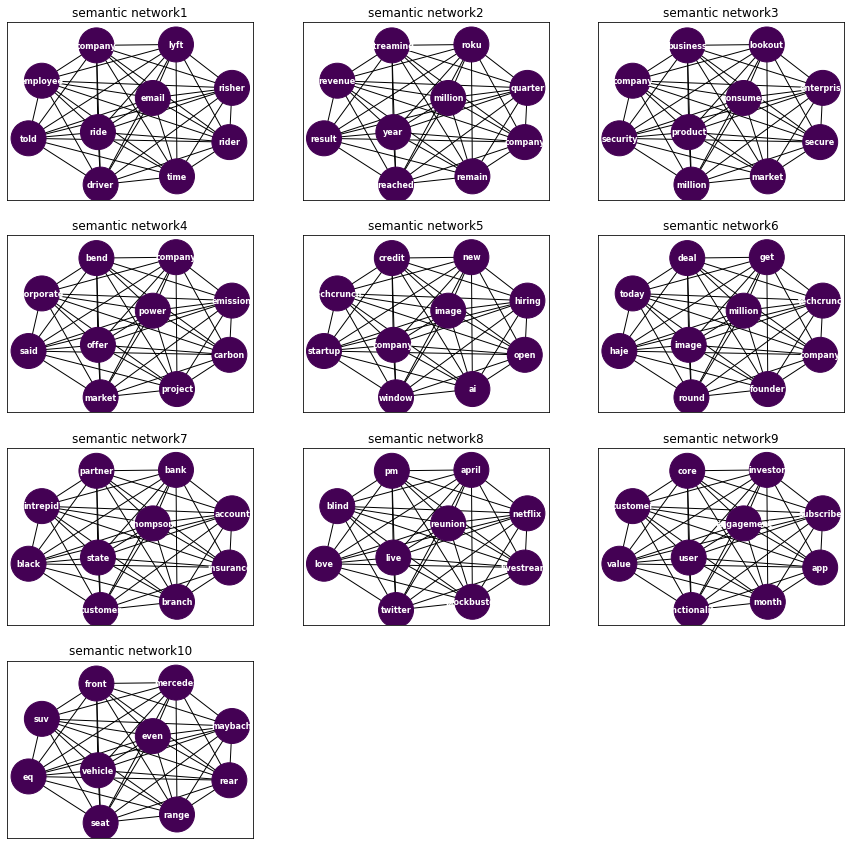

In [110]:
# function to create Semantic Networks of each news
def build_semantic_network(x, i, ax):
    vectorizer = CountVectorizer(max_features=10)
    document_vectors = vectorizer.fit_transform([x])
    feature_names = list(vectorizer.vocabulary_.keys())

    co_occurrence_matrix = np.dot(document_vectors.T, document_vectors)
    co_occurrence_matrix[co_occurrence_matrix > 1] = 1

    G = nx.from_numpy_array(co_occurrence_matrix)
    node_size = [v * 1000 for v in nx.degree_centrality(G).values()]
    node_color = [v for v in nx.degree_centrality(G).values()]
    node_labels = {i: feature for i, feature in enumerate(feature_names)}

    pos = nx.spring_layout(G, seed=42)

    nx.drawing.nx_pylab.draw_networkx(G, node_size=node_size, node_color=node_color, pos=pos, with_labels=True,
                                      labels=node_labels, font_size=8, font_color='white', font_weight='bold', ax=ax)

    ax.set_title('semantic network' + str(i + 1))

temp_lst = df["P_text"].iloc[:10]  # slice the dataframe to get only the first 10 rows
n_rows = int(np.ceil(len(temp_lst) / 3))
fig, axs = plt.subplots(n_rows, ncols=3, figsize=(15, 15))
for i, ax in enumerate(axs.flatten()):
    if i < len(temp_lst):
        build_semantic_network(temp_lst.iloc[i], i, ax)
    else:
        ax.axis('off')
plt.show()


In [ ]:
#explaination and colclusion:-

# These graphs Provides information about the relationships between the words in a string by creating a semantic 
# network for each string in the input list.

# In particular, the semantic network shows which words occur together within the same context. 

# Each node represents a single word, and each edge represents the co-occurrence relationship between them. 

# Those nodes with more edges connecting them to other nodes may have a greater impact on the string's meaning.

# The purpose of this is to understand the meaning and structure of the text, as well as to identify key words or themes.

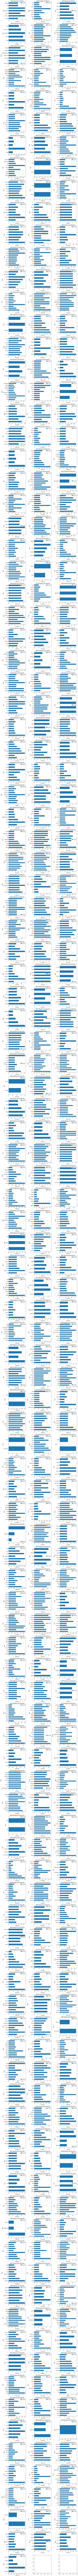

In [27]:
#visua;ization function to get count of the text per news article
def text_visualization(strings):
    n_rows = int(np.ceil(len(strings)/3))
    fig, axs = plt.subplots(n_rows, 3, figsize=(14, 4*n_rows), squeeze=False)

    for i, x in enumerate(strings):
        row_idx = i // 3
        col_idx = i % 3
        ax = axs[row_idx, col_idx]

        sentences = x
        #splitiing the words in the sentence passed
        word_lists = sentences.split()
        # Counting the frequency of each word in the word_lists
        freq = {}

        for word in word_lists:
            if word in freq:
                freq[word] += 1
            else:
                freq[word] = 1
        #selecting the words that occurs most frequently to display in the plot
        j = 2
        vocab = {word: freq for word, freq in freq.items() if freq > j}

        while ( len(vocab) > 10):
            j += 1
            vocab = {word: freq for word, freq in freq.items() if freq > j}

        df1 = pd.DataFrame(list(vocab.items()), columns=['Word', 'Count'])

        # Create a bar chart of the word frequencies
        df1.plot.barh(x='Word', y='Count', rot=0, ax=ax)

        # Set the chart title and axis labels
        ax.set_title(f'Word Frequency for String {i+1}')
        ax.set_xlabel('Frequency')
        ax.set_ylabel('Word')

    plt.tight_layout()
    plt.show()

text_visualization(df["P_text"])

In [ ]:
#explaination and colclusion

# In summary, this function provides a quick way to analyze the most frequently occurring words in a set of news articles, 
# and to compare the word frequencies across different articles.

In [30]:
stop_words = stopwords.words('english')
def get_doc_tokens(doc):
    tokens=[token.strip() \
            for token in nltk.word_tokenize(doc.lower()) \
            if token.strip() not in stop_words and\
               token.strip() not in string.punctuation]
    
    # you can add bigrams, collocations, stemming, 
    # or lemmatization here
    
    token_count={token:tokens.count(token) for token in set(tokens)}
    return token_count

def tfidf(docs):
    # step 2. process all documents to get list of token list
    docs_tokens={idx:get_doc_tokens(doc) \
             for idx,doc in enumerate(docs)}

    # step 3. get document-term matrix
    dtm=pd.DataFrame.from_dict(docs_tokens, orient="index" )
    dtm=dtm.fillna(0)
    dtm = dtm.sort_index(axis = 0)
      
    # step 4. get normalized term frequency (tf) matrix        
    tf=dtm.values
    doc_len=tf.sum(axis=1, keepdims=True)
    tf=np.divide(tf, doc_len)
    
    # step 5. get idf
    df=np.where(tf>0,1,0)
    #idf=np.log(np.divide(len(docs), \
    #    np.sum(df, axis=0)))+1

    smoothed_idf=np.log(np.divide(len(docs)+1, np.sum(df, axis=0)+1))+1    
    smoothed_tf_idf=tf*smoothed_idf
    
    return smoothed_tf_idf

Arr_TF_IDF = tfidf(df['P_text'])

In [31]:
Arr_TF_IDF

array([[0.01387589, 0.01656451, 0.03995974, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00804726, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01462779, 0.        , 0.        , ..., 0.03028322, 0.03028322,
        0.03028322]])

In [32]:
Arr_TF_IDF.shape

(343, 13035)

In [ ]:
#explaination and colclusion:-

#we have a total of 20 news articles that you have analyzed to create the TF-IDF matrix.

#Each news article has been converted into a vector of length 3084 based on the unique words across all the articles.

#The rows of the matrix represent the individual news articles, 

#The columns represent the unique words across all the articles.

#The values in each cell of the matrix represent the TF-IDF score of a particular word in a particular article.

#Overall, this matrix represents the TF-IDF scores of all the words across all the 20 news articles, 
#and it can be used for a variety of natural language processing tasks, such as text classification, clustering, 
#and information retrieval.